In [1]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [2]:
!pip install squarify -qqq

In [3]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

#Import relevant data
orders = pd.read_excel("Dataset.xlsx", "Orders")
returns = pd.read_excel("Dataset.xlsx", "Return")
merge_df = orders.merge(returns, on='Order ID', how='left')
df = merge_df[merge_df['Returned'].isnull()]
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,NaN
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,NaN
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,NaN
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,NaN


In [4]:
#Calculate recency for each customer
rec = df.groupby('Customer ID', as_index=False)['Order Date'].max()
rec_df = pd.DataFrame(rec)
current_date = datetime.datetime(2017, 12, 31)
rec_df['Recency'] = (current_date-rec_df['Order Date']).dt.days
rec_df

,Customer ID,Order Date,Recency
0,AA-10315,2017-06-29,185
1,AA-10375,2017-12-11,20
2,AA-10480,2017-04-15,260
3,AA-10645,2016-09-04,483
4,AB-10015,2016-11-10,416
...,...,...,...
786,XP-21865,2017-10-09,83
787,YC-21895,2017-12-26,5
788,YS-21880,2017-12-21,10
789,ZC-21910,2017-11-06,55


In [5]:
#Calculate frequency for each customer
freq = df.groupby('Customer ID', as_index=False)['Order ID'].nunique()
freq_df = pd.DataFrame(freq)
freq_df.columns = ['Customer ID', 'Frequency']
freq_df

,Customer ID,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,5
4,AB-10015,3
...,...,...
786,XP-21865,9
787,YC-21895,4
788,YS-21880,8
789,ZC-21910,12


In [6]:
#Calculate monetary for each customer
mon = df.groupby('Customer ID', as_index=False)['Sales'].sum()
mon_df = pd.DataFrame(mon)
mon_df.columns = ['Customer ID', 'Monetary']
mon

,Customer ID,Monetary
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5073.975
4,AB-10015,886.156
...,...,...
786,XP-21865,2110.726
787,YC-21895,5438.650
788,YS-21880,6720.444
789,ZC-21910,7892.998


In [7]:
#Recency, Frequency, Monetary for each customer
rfm_df = rec_df.merge(freq_df.merge(mon_df, on='Customer ID', how='outer'), on='Customer ID', how='outer').drop(columns='Order Date')
rfm_df

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,483,5,5073.975
4,AB-10015,416,3,886.156
...,...,...,...,...
786,XP-21865,83,9,2110.726
787,YC-21895,5,4,5438.650
788,YS-21880,10,8,6720.444
789,ZC-21910,55,12,7892.998


In [8]:
#Calculate RFM score for each customer
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 5, labels=['5','4','3','2','1'])
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'], 5, labels=['1','2','3','4','5'])
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 5, labels=['1','2','3','4','5'])
rfm_df['RFM Score'] = rfm_df['R_score'].astype(str)+rfm_df['F_score'].astype(str)+rfm_df['M_score'].astype(str)
rfm_df

,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM Score
0,AA-10315,185,5,5563.560,2,2,5,225
1,AA-10375,20,9,1056.390,5,5,2,552
2,AA-10480,260,4,1790.512,2,1,3,213
3,AA-10645,483,5,5073.975,1,2,5,125
4,AB-10015,416,3,886.156,1,1,2,112
...,...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3,353
787,YC-21895,5,4,5438.650,5,1,5,515
788,YS-21880,10,8,6720.444,5,4,5,545
789,ZC-21910,55,12,7892.998,4,5,5,455


In [9]:
#RFM score and corresponding segment
seg = pd.read_excel("Dataset.xlsx", "Segmentation")
seg['RFM Score'] = seg['RFM Score'].apply(lambda x: x.split(','))
seg = seg.explode('RFM Score', ignore_index = True)
seg['RFM Score'] = seg['RFM Score'].str.replace(" ", "")
seg

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [10]:
#Putting customers in segments according to RFM score
score = rfm_df.merge(seg, on='RFM Score', how='left')
score

,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM Score,Segment
0,AA-10315,185,5,5563.560,2,2,5,225,At Risk
1,AA-10375,20,9,1056.390,5,5,2,552,Potential Loyalist
2,AA-10480,260,4,1790.512,2,1,3,213,About To Sleep
3,AA-10645,483,5,5073.975,1,2,5,125,At Risk
4,AB-10015,416,3,886.156,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3,353,Potential Loyalist
787,YC-21895,5,4,5438.650,5,1,5,515,Promising
788,YS-21880,10,8,6720.444,5,4,5,545,Champions
789,ZC-21910,55,12,7892.998,4,5,5,455,Champions


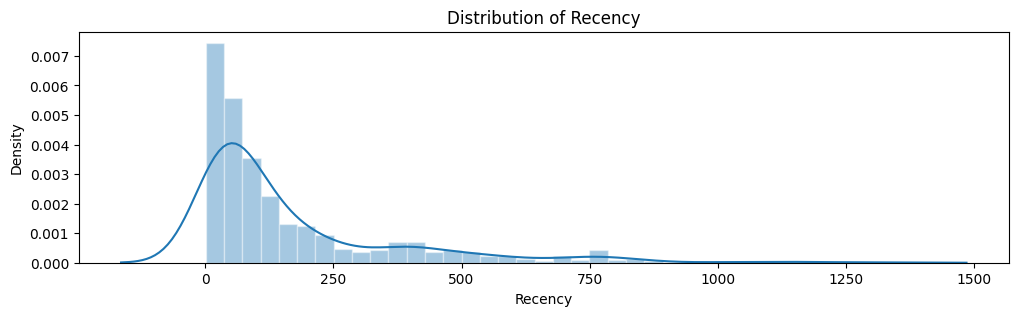

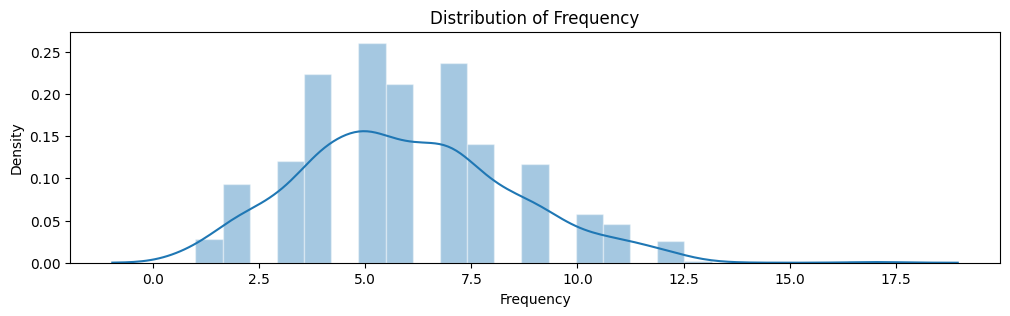

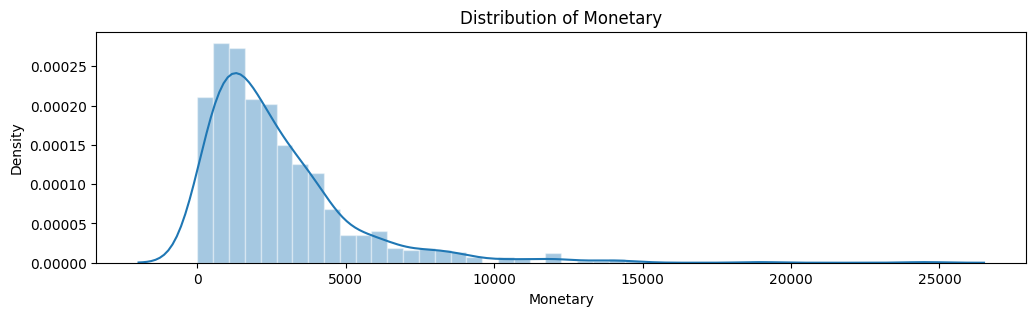

In [11]:
#Plot distribution of R, F, M
colnames = ['Recency', 'Frequency', 'Monetary']
for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.histplot(score[col], kde=True, stat='density', kde_kws=dict(cut=3), alpha=0.4, edgecolor=(1, 1, 1, 0.4))
    ax.set_title('Distribution of %s' % col)
    plt.show()

Insights:

- Recency: Recency distribution is right-skewed, showing that the majority of customers made a purchase in the recent past. It has a long tail containing single customers who made their order long time ago. Most customers has purchased in the last 0-100 days.

- Frequency: Frequency distribution peaks at 5 orders, indicating that  number of customers who purchased 5 orders is highest. Most customers purchased from 3-7 orders.

- Monetary: Recency distribution is right-skewed, showing total monetary value of most customers lie between the 0 to 5000 USD range, highest around 1000-2000 USD. The long tail indicates few customers who has very high total order value.



In [18]:
#Total customer, revenue per segment
rev_per_seg = score.groupby('Segment', as_index=False).agg({'Customer ID':'count','Monetary':'sum'})
rev_per_seg.columns = ['Segment','Total Customer','Revenue']
rev_per_seg['C_Share'] = rev_per_seg['Total Customer']/rev_per_seg['Total Customer'].sum()
rev_per_seg['R_Share'] = rev_per_seg['Revenue']/rev_per_seg['Revenue'].sum()
rev_per_seg

,Segment,Total Customer,Revenue,C_Share,R_Share
0,About To Sleep,44,47310.1172,0.055626,0.022351
1,At Risk,96,385996.8861,0.121365,0.182358
2,Cannot Lose Them,36,150229.9414,0.045512,0.070974
3,Champions,71,382096.5868,0.089760,0.180516
4,Hibernating customers,90,109960.2510,0.113780,0.051949
5,Lost customers,83,54264.2255,0.104930,0.025636
6,Loyal,62,270680.2154,0.078382,0.127879
7,Need Attention,72,259412.3922,0.091024,0.122555
8,New Customers,61,40997.1410,0.077118,0.019368
9,Potential Loyalist,113,190944.9303,0.142857,0.090209


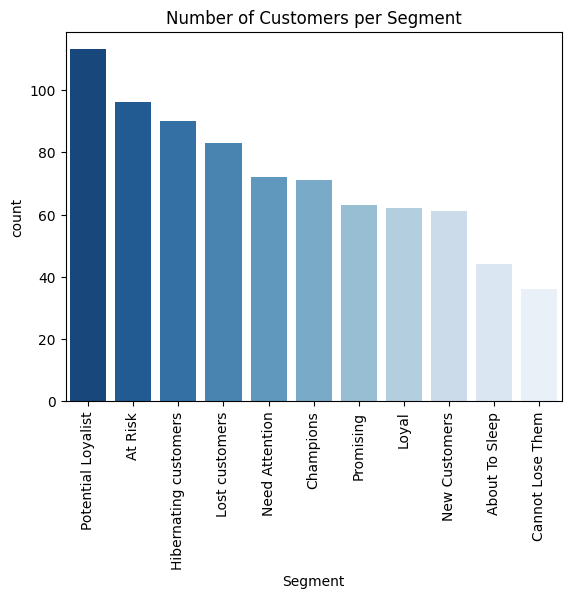

In [13]:
#Plot total customer per segment
g = sns.countplot(x='Segment', data=score, palette='Blues_r', order=score['Segment'].value_counts().index).set(title='Number of Customers per Segment')
plt.xticks(rotation=90)
plt.show()

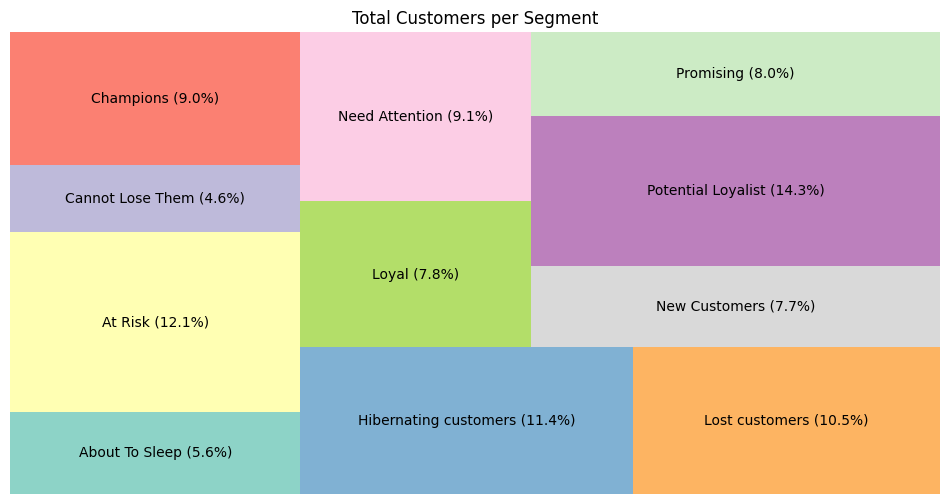

In [14]:
#Plot total customer per segment
plt.figure(figsize=(12,6))
labels = rev_per_seg['Segment'] + rev_per_seg['C_Share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))
treemap1 = squarify.plot(sizes=rev_per_seg['C_Share'],label=labels,
              color=sns.color_palette("Set3",11))
treemap1.set_title('Total Customers per Segment')
plt.axis("off")
plt.show()

Insights:

- Number of customers in Potential Loyalist segment is the highest (14.3%), next is At Risk of 12.1%
- Number of customers in Champions and Loyal is average. Total number of customers  in Champions, Loyal, Potential Loyalist constitute around 1/3 of all customers
- However, more attention must be paid as total customers in At Risk, Hibernating, Lost Customers, About to Sleep makes up of up to 40% of all customers

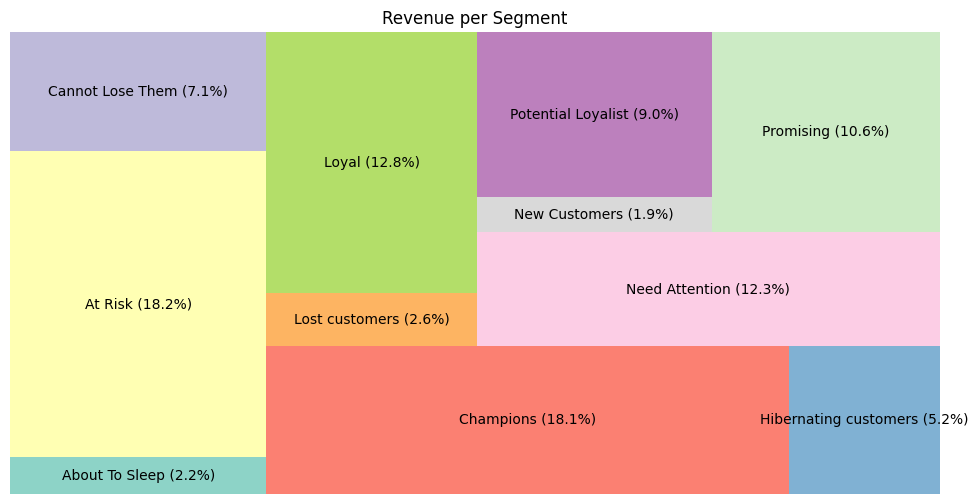

In [15]:
#Plot revenue per segment
plt.figure(figsize=(12,6))
labels = rev_per_seg['Segment'] + rev_per_seg['R_Share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))
treemap2 = squarify.plot(sizes=rev_per_seg['R_Share'],label=labels,
              color=sns.color_palette("Set3",11))
treemap2.set_title('Revenue per Segment')
plt.axis("off")
plt.show()

Insights:
- At Risk has the highest sales (18.2%)
- Champions are the most profitable customers (9% of customers generate 18.1% revenue)
- Loyal customers are also profitable (7.8% of customers generate 12.8% revenue)
- Potential Loyalist's revenue only constitute of 9%, only half the number of At Risk even though the number of customers in this segment is 2.2% higher than At Risk
- Need Attention and Promising generate relatively good revenue, 12.3% and 10.6% respectively.

In [25]:
#Average recency, frequency, monetary for each segment
mean_rfm = score.groupby('Segment', as_index=False).agg({'Recency':'mean','Frequency':'mean','Monetary':'mean'})
mean_rfm

,Segment,Recency,Frequency,Monetary
0,About To Sleep,135.204545,4.750000,1075.229936
1,At Risk,259.041667,7.260417,4020.800897
2,Cannot Lose Them,496.527778,4.694444,4173.053928
3,Champions,28.521127,9.830986,5381.642068
4,Hibernating customers,190.044444,4.733333,1221.780567
5,Lost customers,557.963855,2.975904,653.785849
6,Loyal,60.725806,8.161290,4365.809926
7,Need Attention,50.138889,6.527778,3602.949892
8,New Customers,41.475410,3.393443,672.084279
9,Potential Loyalist,45.185841,7.079646,1689.778144


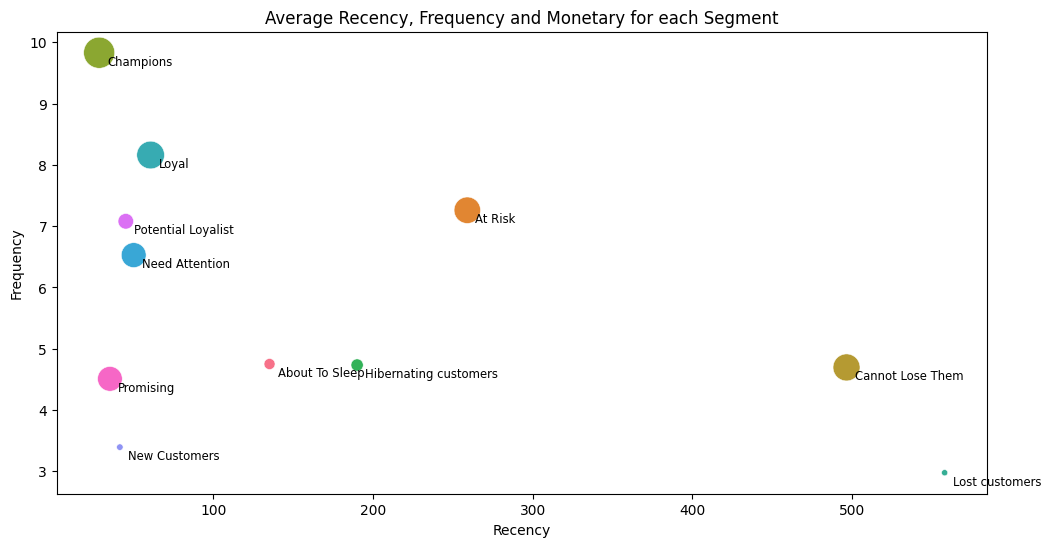

In [26]:
plt.figure(figsize=(12,6))
scat = sns.scatterplot(x='Recency', y='Frequency', data=mean_rfm, hue='Segment', size='Monetary', sizes=(20,500))
for i in range(len(mean_rfm)):
     plt.text(mean_rfm['Recency'][i]+5,
               mean_rfm['Frequency'][i]-0.2,
               mean_rfm['Segment'][i],
               horizontalalignment='left',
               size='small', color='black')
scat.get_legend().remove()
scat.set_title('Average Recency, Frequency and Monetary for each Segment')
plt.show()

Insights:
- Champions and Loyal: purchased recently, frequently and spent a good amount
- Potential Loyalist: purchased recently with average frequency, and average amount of money
- At Risk: purchased frequently with high order value but has not purchased in a while
- Need Attention: recency and frequency is not much lower than Potential Loyalist but order value is considerably higher
- Promising: purchased recently, high order value but low frequency
- Cannot Lose Them: high order value but low frequency and has not purchased in over 1 year in average

Based on the above analysis, the store should:

- Retain Champions and Loyal as these 2 segments generate highest revenue
- Attempt to turn Potential Loyalist and Need Attention into Champions and Loyal to increase revenue
- Pay more attention to At Risk, Cannot Lose Them and Promising as these customers have a tendency to spend a good amount of money even though they do not purchase frequently or have not purchased in a while.

Some specific recommendations for each of the above mentioned segments are as below:

1. Champions, Loyal:
- Express gratitudes to these customers by sending special gifts
- Since these customers are willing to pay good amount of money and are willing to buy new products from the store, instead of using discount pricing to generate incremental sales, focus on value added offers through product recommendations based on previous purchases to cross/up-sell
- Offer them to join the special loyalty program with higher benefits than regular customers (faster shipping, benefits when using the services of the store's partners, buying new products earlier than regular customers,...)

2. Potential Loyalist, Need Attention:
- Encourage membership registration to be able to accumulate points, redeem reward points when making purchases
- Recommend other related products based on purchase history
- Offer incentives tied to spending thresholds

3. At Risk, Cannot Lose Them, Promising:
- Offer attractive discounts for customers who have had high order value in the past
- Recommend other products based on purchase history
- Promote membership program with attractive offers of to encourage these customers to register for membership and accumulate points at the store
- Give rewards to people making referrals or social endorsements

